<a href="https://colab.research.google.com/github/keithferns98/ML/blob/main/KMEANSCLUSTERINGFROMSCRACTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(42)
def manhatton_distance(x1,x2):
  return np.sum(np.absolute(x1-x2))

class KMeans:
  def __init__(self,K=5,max_iters=10,plot_steps=False):
    self.K=K
    self.max_iters=max_iters
    self.plot_steps=plot_steps
    #empty list (i.e. 5 because K is 5) for storing the indices
    self.clusters=[[] for _ in range(self.K)]
    #here the mean of the cluster will be storedf
    self.centroids=[]
  
  
  def predict(self,X):
    self.X=X #Intializing  the Data
    self.n_samples,self.n_features=X.shape #then n_samples for rows and n_features for columns
    #initialize centroids
    random_sample_idx=np.random.choice(self.n_samples,self.K,replace=False)
    self.centroids=[self.X[idx] for idx in random_sample_idx]
    #optimization
    for _ in range(self.max_iters) :

      #update clusters
      self.clusters= self._create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()
      #update centroids
      centroids_old=self.centroids
      self.centroids=self._get_centroids(self.clusters)
      if self.plot_steps:
        self.plot()
      #check convergence
      if self._is_converged(centroids_old,self.centroids):
        break
   
    return self._get_cluster_labels(self.clusters)
   
  def _get_cluster_labels(self,clusters):
    labels=np.empty(self.n_samples)
    for cluster_idx,cluster in enumerate(clusters):
      for sample_idx in cluster: 
        labels[sample_idx]=cluster_idx
    return labels

  def _create_clusters(self,centroids):
    clusters=[[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx=self._closest_centroid(sample,centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self,sample,centorids):
    distances=[manhatton_distance(sample,point)for point in centorids]
    closest_idx=np.argmin(distances)
    return closest_idx
  
  def _get_centroids(self,clusters):
    centroids=np.zeros((self.K,self.n_features))
    for cluster_idx,cluster in enumerate(clusters):
      cluster_mean=np.mean(self.X[cluster],axis=0)
      centroids[cluster_idx]=cluster_mean
    return centroids
  
  def _is_converged(self,centroids_old,centroids):
    distances=[manhatton_distance(centroids_old[i],centroids[i]) for i in range(self.K)]
    return sum(distances)==0

  def plot(self):
    fig,ax=plt.subplots(figsize=(12,8))
    for i,index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point)
    
    for point in self.centroids:
      ax.scatter(*point,marker='x',c='black',linewidth=2)
    plt.show()





In [3]:
X,y=make_blobs(centers=4,n_samples=500,n_features=2,shuffle=True,random_state=42)
X.shape

(500, 2)

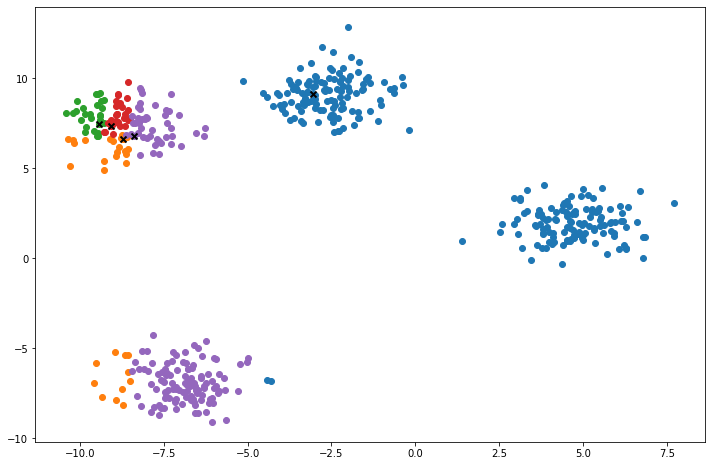

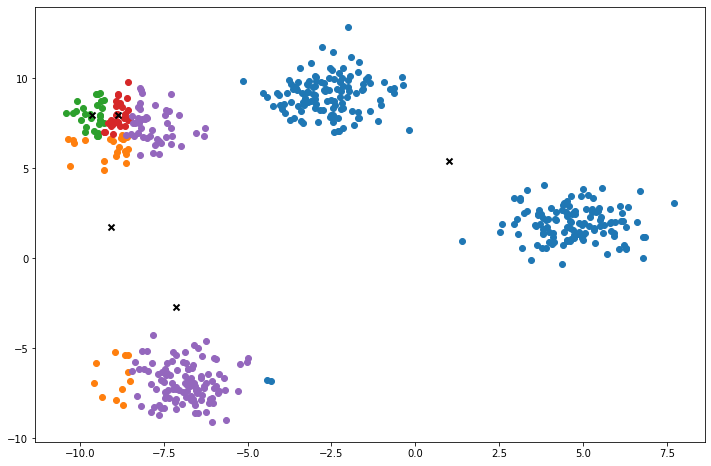

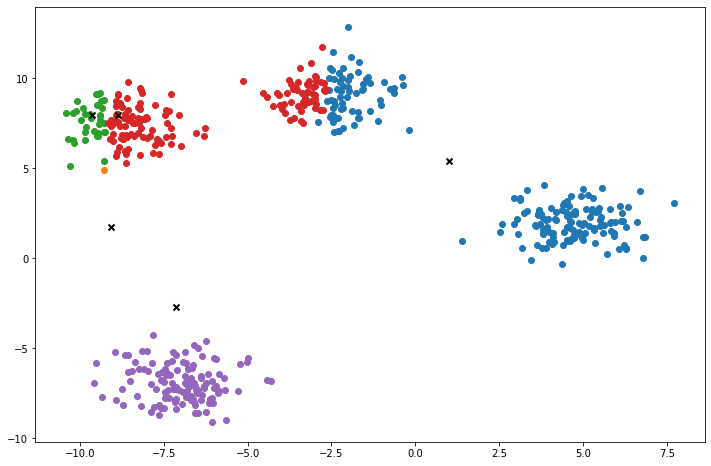

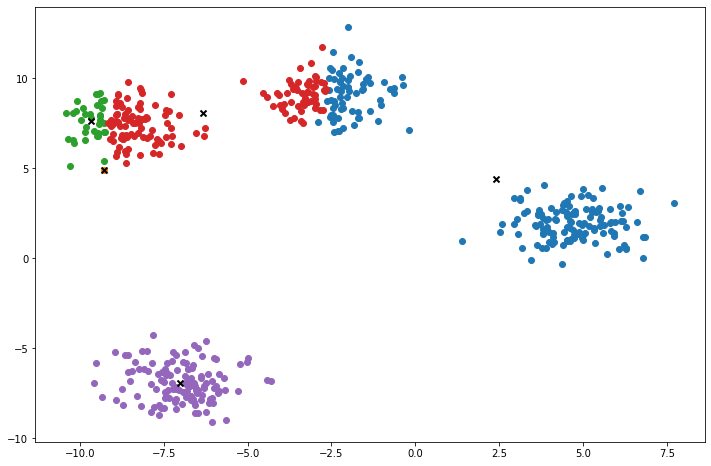

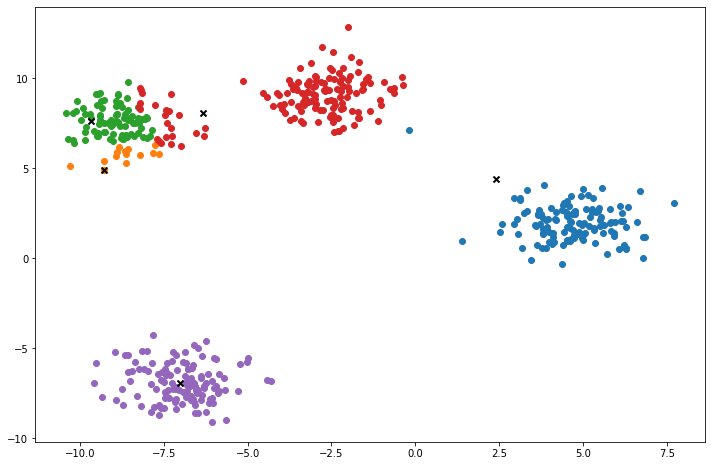

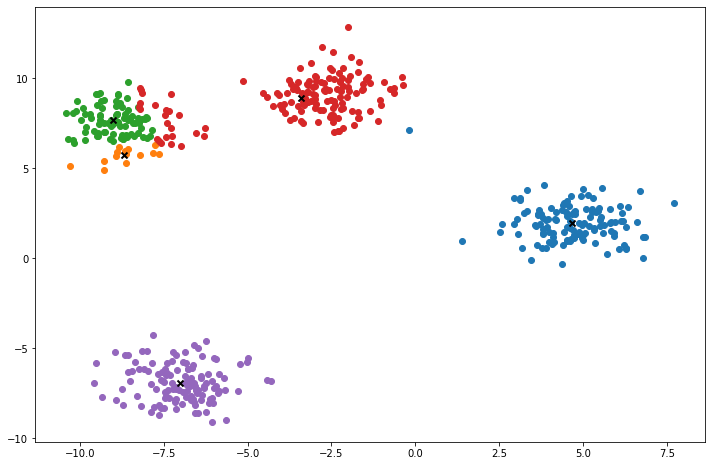

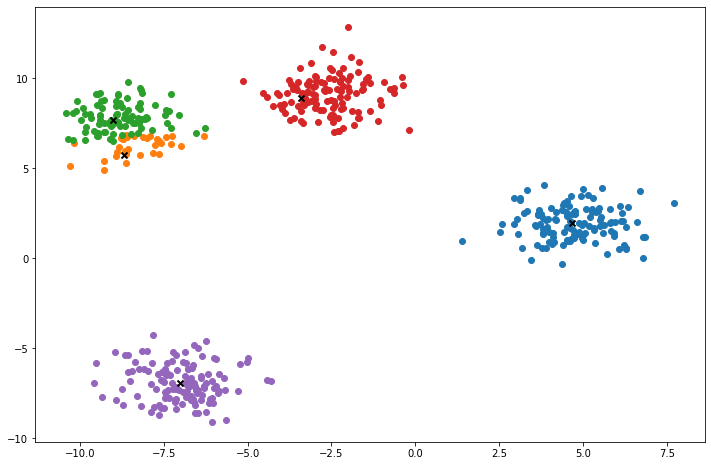

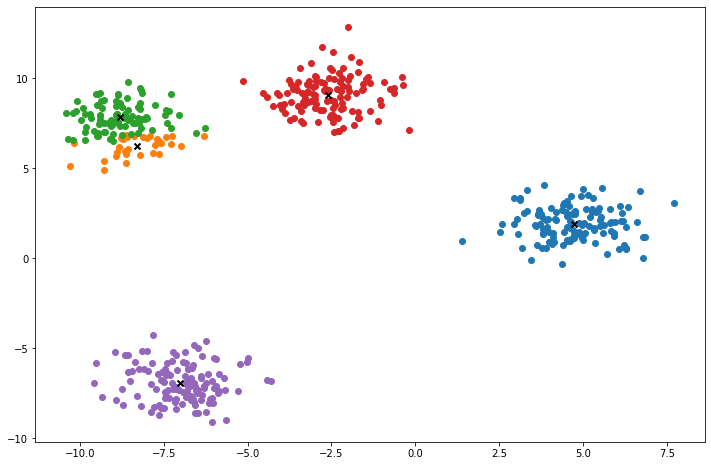

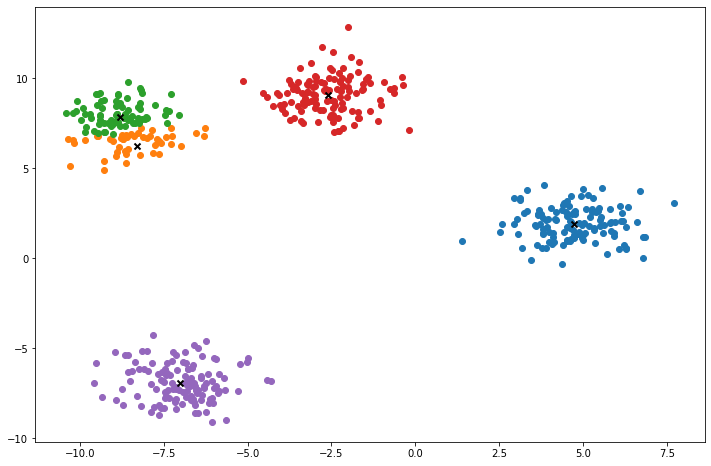

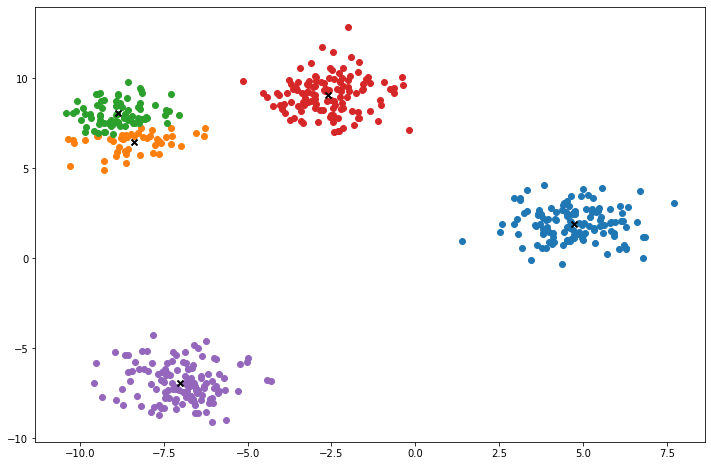

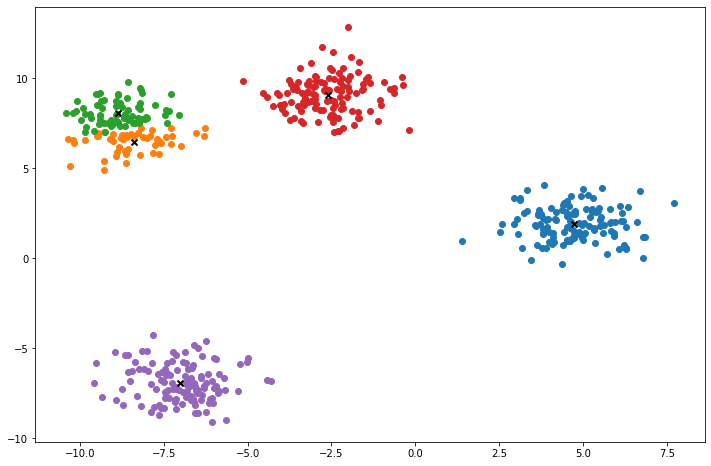

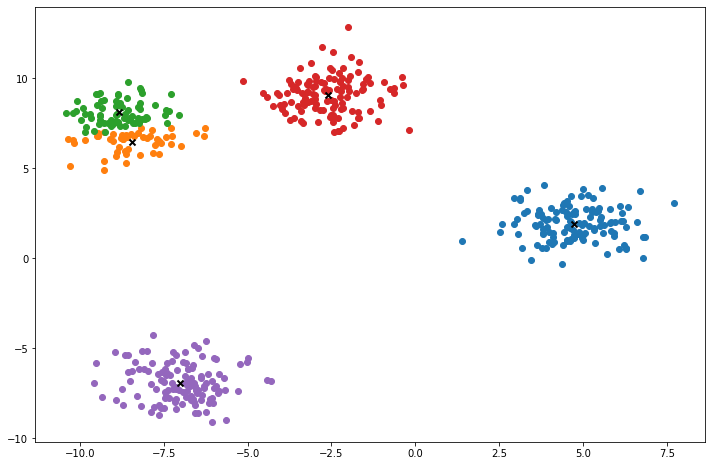

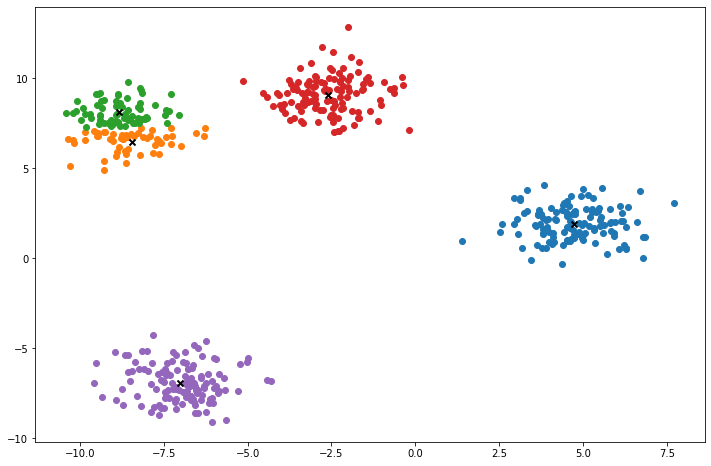

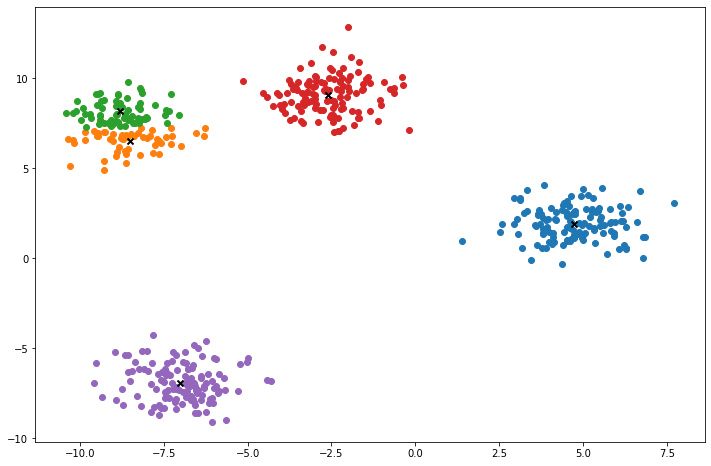

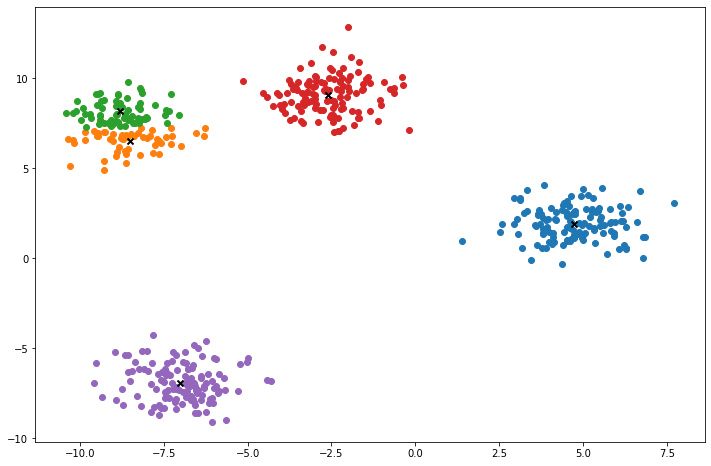

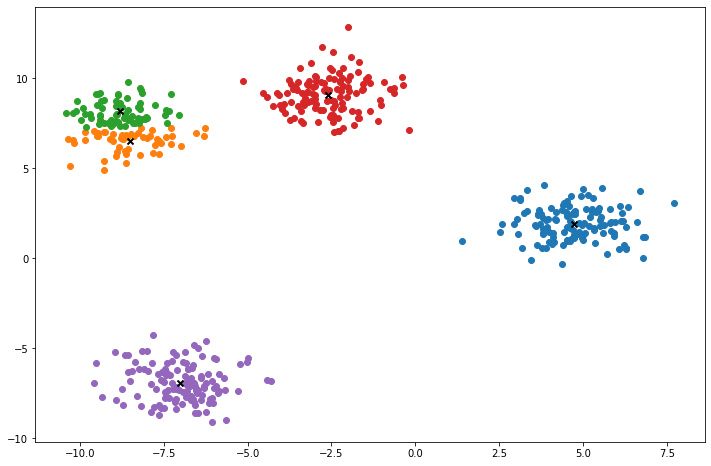

In [4]:
clf=KMeans(K=5,max_iters=10,plot_steps=True)
y_pred=clf.predict(X)

In [5]:
cent_loc=clf.centroids
cent_loc

array([[ 4.72182456,  1.9238556 ],
       [-8.51082366,  6.50041128],
       [-8.80720187,  8.15846825],
       [-2.60221541,  9.09243505],
       [-7.0009649 , -6.90445754]])

In [6]:
for cent_labels,cent_locs in enumerate(cent_loc):
  print(cent_labels,cent_locs)

0 [4.72182456 1.9238556 ]
1 [-8.51082366  6.50041128]
2 [-8.80720187  8.15846825]
3 [-2.60221541  9.09243505]
4 [-7.0009649  -6.90445754]


In [7]:
cls_0=clf.clusters[0]

In [8]:
cls_0

[2,
 8,
 10,
 12,
 15,
 20,
 22,
 36,
 37,
 41,
 45,
 46,
 47,
 54,
 64,
 68,
 70,
 78,
 81,
 88,
 92,
 94,
 97,
 100,
 101,
 102,
 116,
 121,
 123,
 125,
 126,
 131,
 132,
 134,
 138,
 139,
 142,
 143,
 152,
 153,
 162,
 163,
 166,
 187,
 204,
 207,
 208,
 219,
 220,
 224,
 229,
 231,
 238,
 239,
 240,
 243,
 246,
 254,
 255,
 259,
 266,
 268,
 272,
 277,
 281,
 282,
 286,
 288,
 293,
 295,
 297,
 299,
 302,
 303,
 305,
 308,
 309,
 312,
 313,
 314,
 317,
 318,
 319,
 321,
 322,
 334,
 339,
 340,
 341,
 348,
 351,
 360,
 365,
 367,
 368,
 372,
 375,
 377,
 391,
 396,
 400,
 404,
 405,
 412,
 415,
 418,
 420,
 424,
 429,
 430,
 436,
 441,
 443,
 449,
 450,
 456,
 459,
 461,
 463,
 465,
 467,
 478,
 480,
 488,
 499]

In [9]:
y=X.copy()
y.shape

(500, 2)

In [14]:
y_cls_0=[]
for cls_idx,cls in enumerate(cls_0):
    y_cls_0.append(y[cls])
    

In [17]:
len(y_cls_0)

125

In [18]:
y_cls_0

[array([6.82968177, 1.1648714 ]),
 array([3.57225841, 1.8307902 ]),
 array([3.99330595, 0.89162168]),
 array([6.77291221, 0.02108188]),
 array([5.69830332, 0.2144302 ]),
 array([3.24131126, 2.53613892]),
 array([5.2164358 , 2.28441984]),
 array([3.81765844, 2.2168569 ]),
 array([3.03343252, 2.17663332]),
 array([5.94535764, 1.99417353]),
 array([6.28484655, 1.72413364]),
 array([4.52755079, 1.75220008]),
 array([5.35149371, 0.84852759]),
 array([4.98163481, 3.84934052]),
 array([4.39091469, 2.94474063]),
 array([4.70968092, 1.58785609]),
 array([4.52533899, 3.210986  ]),
 array([5.05281029, 1.40944513]),
 array([5.26399865, 2.60151519]),
 array([4.08622953, 0.77529179]),
 array([3.63386145, 0.75898107]),
 array([4.97219285, 1.22468315]),
 array([3.65837019, 2.43527316]),
 array([4.53284848, 0.93792736]),
 array([4.75339618, 2.63530036]),
 array([6.22589565, 0.73535419]),
 array([3.71294836, 1.91364433]),
 array([5.80304259, 1.98340274]),
 array([3.88074617, 2.12356347]),
 array([6.1422